Họ tên: Lê Hữu Sang

MSSV: 22120310

# HW1: Giới thiệu CUDA

Với các GPU tương đối mới thì để biên dịch chỉ cần dùng câu lệnh: \
`nvcc tên-file.cu -o tên-file-chạy`

Nhưng trên Colab mình thường lấy được GPU khá cũ là Tesla K80 với compute capability (phiên bản phần cứng) là 3.7; để biên dịch đúng với GPU khá cũ này thì bạn cần dùng câu lệnh: \
`nvcc -arch=sm_37 tên-file.cu -o tên-file-chạy` \
Trong đó, 37 chính là compute capability của GPU Tesla K80.

Để phòng trường hợp khi làm bài bạn lấy được GPU có compute capability x.x nhưng khi chấm bài Thầy lại lấy được GPU có compute capability khác x.x, dưới đây mình sẽ có đoạn code Python để tự động lấy 2 con số ứng với compute capability của GPU và lưu vào 2 biến `major` và `minor`:


In [1]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


Một khi đã chạy đoạn code Python ở trên, để biên dịch thì bạn sẽ dùng câu lệnh: \
`nvcc -arch=sm_{major}{minor} tên-file.cu -o tên-file-chạy`

Dưới đây, khi làm bài thì bạn có thể tùy ý thêm/xóa cell. Đừng xóa mấy cell có chữ của Thầy là được.

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

def show_pnm_side_by_side(file_list, titles=None, figsize=(15, 5)):
    n = len(file_list)
    plt.figure(figsize=figsize)

    for i, path in enumerate(file_list):
        try:
            img = Image.open(path)
        except Exception as e:
            print(f"Cannot open {path}: {e}")
            continue

        plt.subplot(1, n, i + 1)
        cmap = "gray" if img.mode == "L" else None
        plt.imshow(img, cmap=cmap)
        title = titles[i] if titles and i < len(titles) else path
        plt.title(title)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


## Câu 1

In [3]:
!nvcc -arch=sm_{major}{minor} HW1_P1.cu -o HW1_P1.out



### Default image

In [4]:
!./HW1_P1.out in.pnm out1.pnm

Image size (width x height): 512 x 512

Processing time (use host): 3.315776 ms

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time (use device): 1.064672 ms

Error between device result and host result: 0.002674
Output file: out1_host.pnm, out1_device.pnm

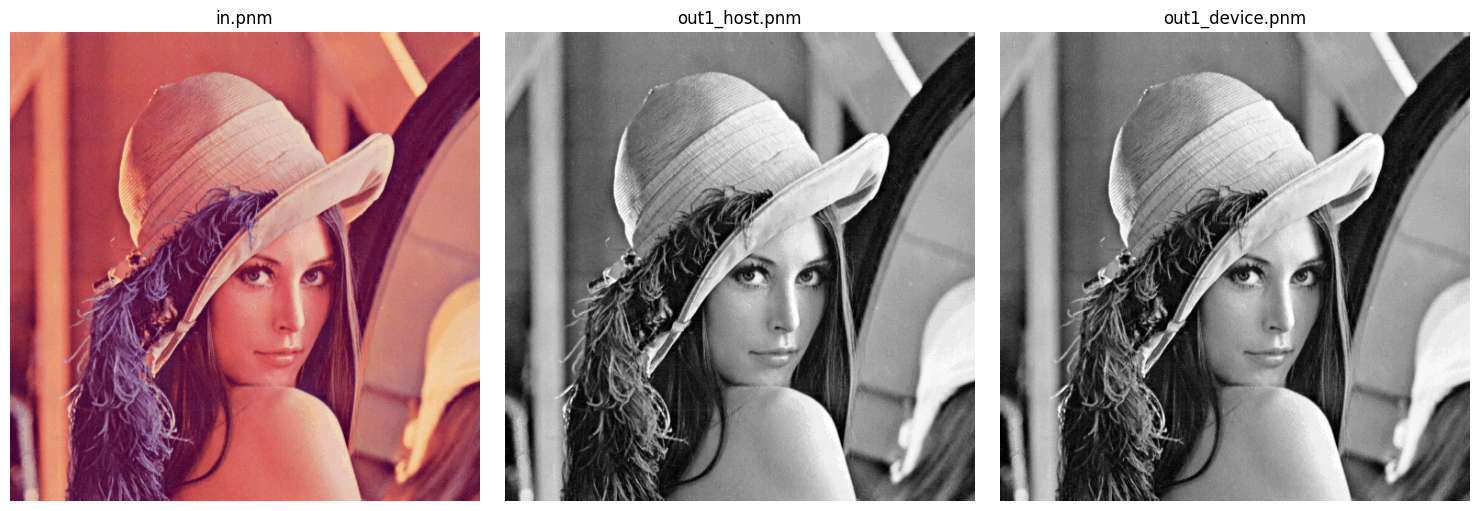

In [5]:
show_pnm_side_by_side("in.pnm out1_host.pnm out1_device.pnm".split(" "))

### Default image with unvalid block dim

In [6]:
!./HW1_P1.out in.pnm out1.pnm 64 64

Image size (width x height): 512 x 512

Processing time (use host): 3.602432 ms

GPU name: Tesla T4
GPU compute capability: 7.5
Error: total threads per block (4096) exceeds maxThreadsPerBlock (1024)


### 250 x 250 image

In [7]:
!./HW1_P1.out 250x250.pnm out1_250x250.pnm

Image size (width x height): 250 x 250

Processing time (use host): 0.793280 ms

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time (use device): 2.605376 ms

Error between device result and host result: 0.000384
Output file: out1_250x250_host.pnm, out1_250x250_device.pnm

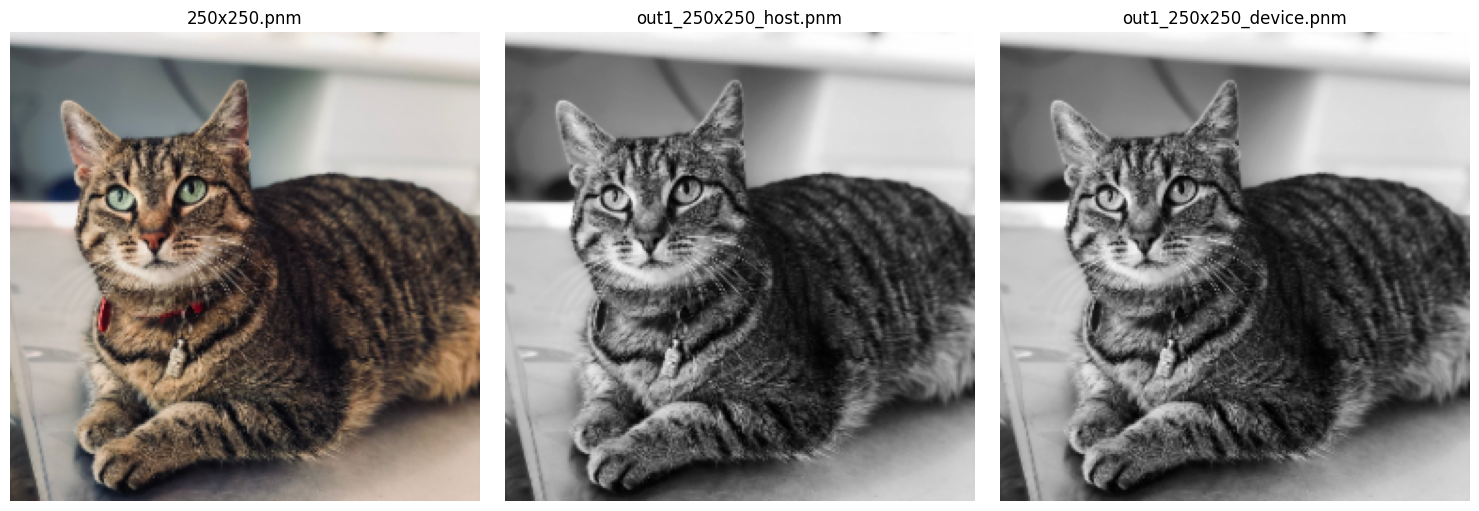

In [8]:
show_pnm_side_by_side("250x250.pnm out1_250x250_host.pnm out1_250x250_device.pnm".split())

### 500 x 1000 image

In [9]:
!./HW1_P1.out 500x1000.pnm out1_500x1000.pnm

Image size (width x height): 500 x 1000

Processing time (use host): 3.887552 ms

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time (use device): 1.284320 ms

Error between device result and host result: 0.000002
Output file: out1_500x1000_host.pnm, out1_500x1000_device.pnm

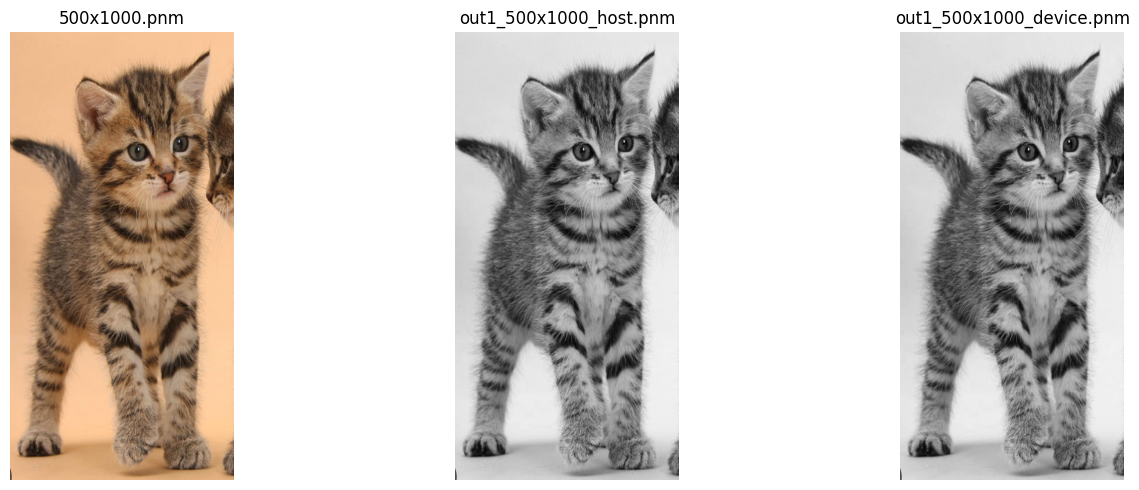

In [10]:
show_pnm_side_by_side("500x1000.pnm out1_500x1000_host.pnm out1_500x1000_device.pnm".split())

### 1 x 1 image

In [11]:
!./HW1_P1.out 1x1.pnm out1_1x1.pnm

Image size (width x height): 1 x 1

Processing time (use host): 0.009888 ms

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time (use device): 0.502432 ms

Error between device result and host result: 0.000000
Output file: out1_1x1_host.pnm, out1_1x1_device.pnm

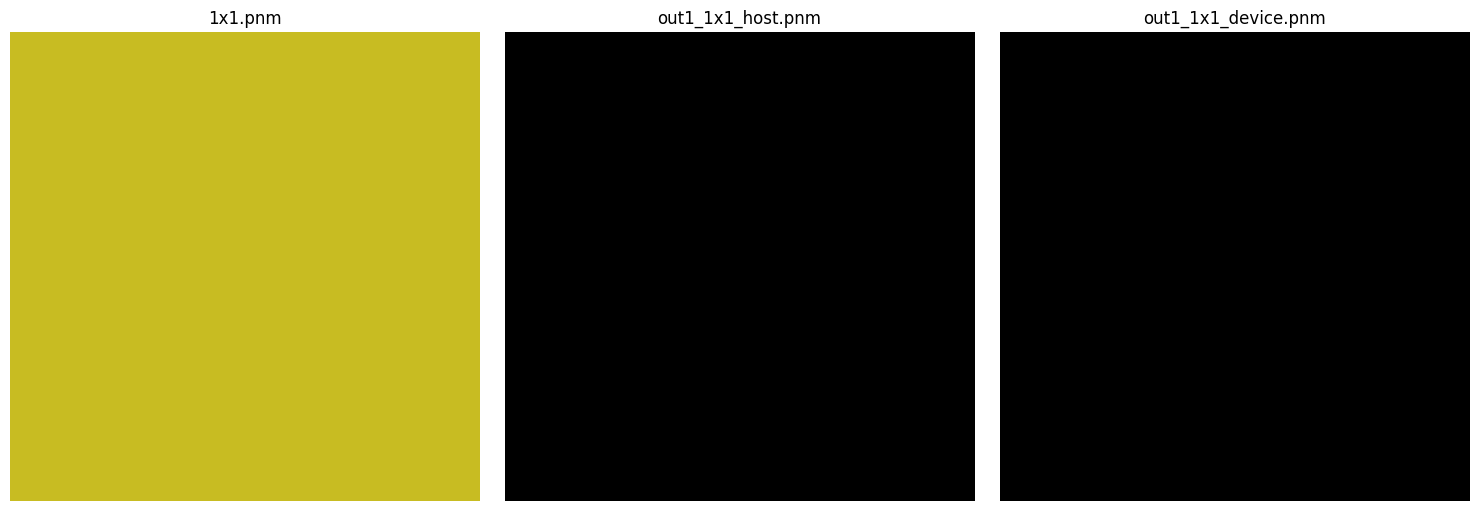

In [12]:
show_pnm_side_by_side("1x1.pnm out1_1x1_host.pnm out1_1x1_device.pnm".split())

## Câu 2

In [13]:
!nvcc -arch=sm_{major}{minor} HW1_P2.cu -o HW1_P2.out



### Default input with default filter (blur)

In [14]:
!./HW1_P2.out in.pnm out2.pnm out2_target.pnm

Image size (width x height): 512 x 512

Processing time (use host): 205.116699 ms
Error: 0.000000

GPU name: Tesla T4
GPU compute capability: 7.5
Block: 32 x 32, filterWidth=9
Processing time (use device): 1.792864 ms
Error: 0.000703

Error between host and device: 0.000703



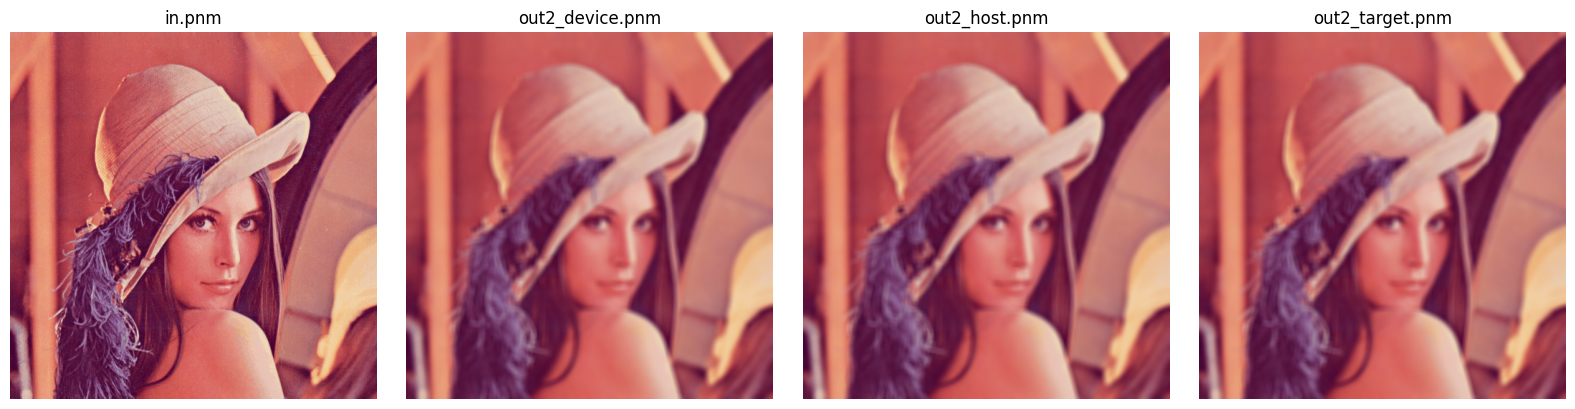

In [15]:
show_pnm_side_by_side("in.pnm out2_device.pnm out2_host.pnm out2_target.pnm".split(), figsize=(16, 4))

### Invalid block dim

In [16]:
!./HW1_P2.out in.pnm out2.pnm out2_target.pnm 64 64

Image size (width x height): 512 x 512

Processing time (use host): 207.946396 ms
Error: 0.000000

GPU name: Tesla T4
GPU compute capability: 7.5
Error: total threads per block (4096) exceeds maxThreadsPerBlock (1024)


### Custom image 250x250 with default filter (blur)
*There is no target image*

In [17]:
!./HW1_P2.out 250x250.pnm out2_250x250.pnm 250x250.pnm

Image size (width x height): 250 x 250

Processing time (use host): 50.645023 ms
Error: 11.502267

GPU name: Tesla T4
GPU compute capability: 7.5
Block: 32 x 32, filterWidth=9
Processing time (use device): 0.828544 ms
Error: 11.502341

Error between host and device: 0.000896



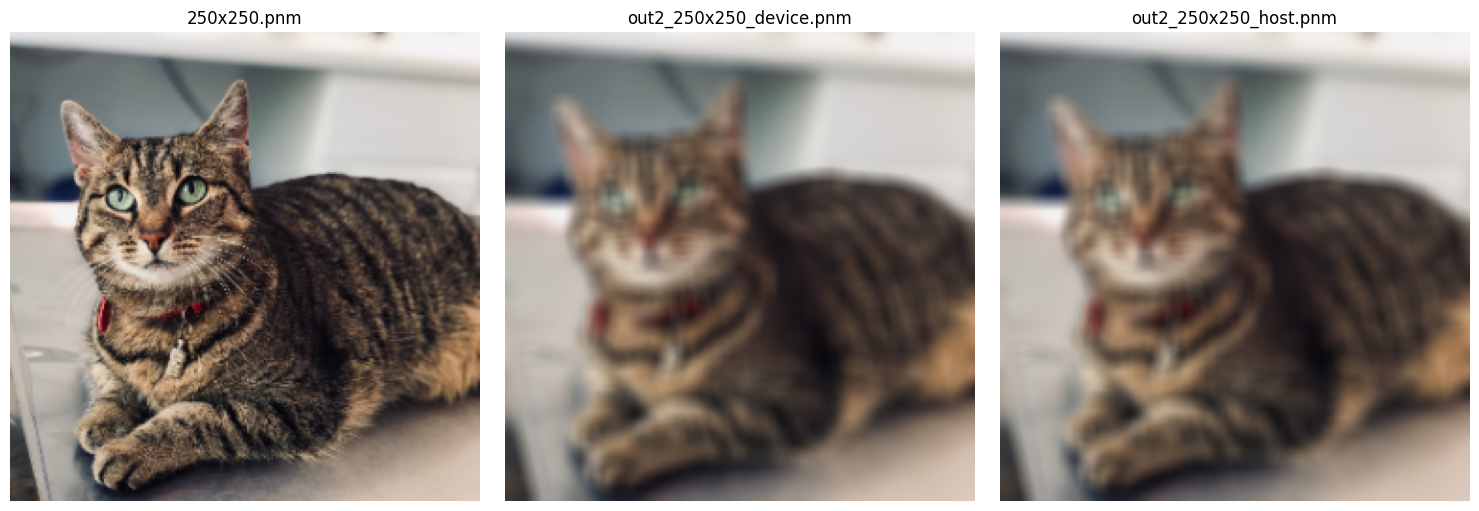

In [18]:
show_pnm_side_by_side("250x250.pnm out2_250x250_device.pnm out2_250x250_host.pnm".split())

### Custom image 500x1000 with default filter (blur)
*There is no target image*

In [19]:
!./HW1_P2.out 500x1000.pnm out2_500x1000.pnm 500x1000.pnm

Image size (width x height): 500 x 1000

Processing time (use host): 396.697083 ms
Error: 5.585612

GPU name: Tesla T4
GPU compute capability: 7.5
Block: 32 x 32, filterWidth=9
Processing time (use device): 2.985664 ms
Error: 5.585648

Error between host and device: 0.000849



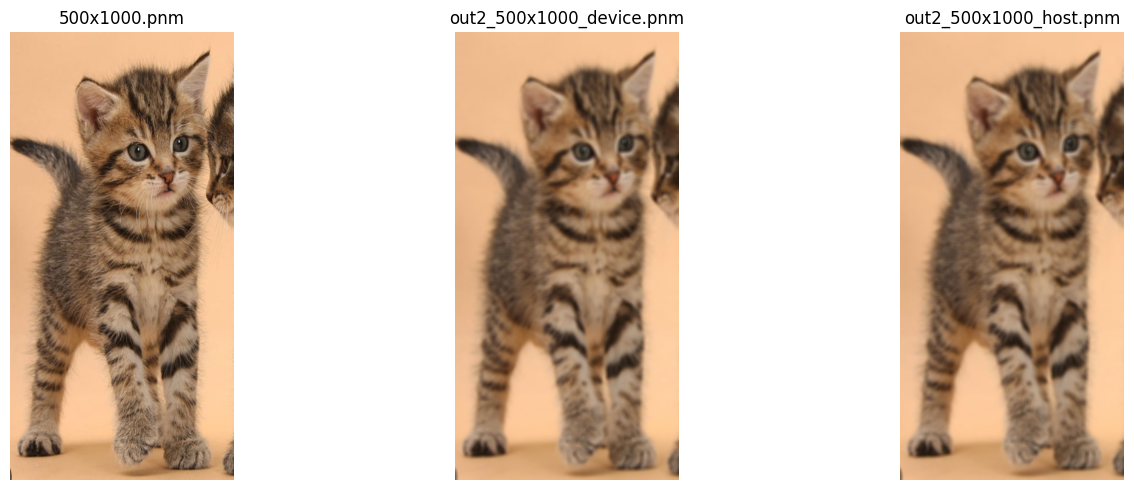

In [20]:
show_pnm_side_by_side("500x1000.pnm out2_500x1000_device.pnm out2_500x1000_host.pnm".split())

### Custom image only 1 pixel with default filter (blur)
*There is no target image*

In [21]:
!./HW1_P2.out 1x1.pnm out2_1x1.pnm 1x1.pnm

Image size (width x height): 1 x 1

Processing time (use host): 0.004128 ms
Error: 0.666667

GPU name: Tesla T4
GPU compute capability: 7.5
Block: 32 x 32, filterWidth=9
Processing time (use device): 0.513184 ms
Error: 0.666667

Error between host and device: 0.000000



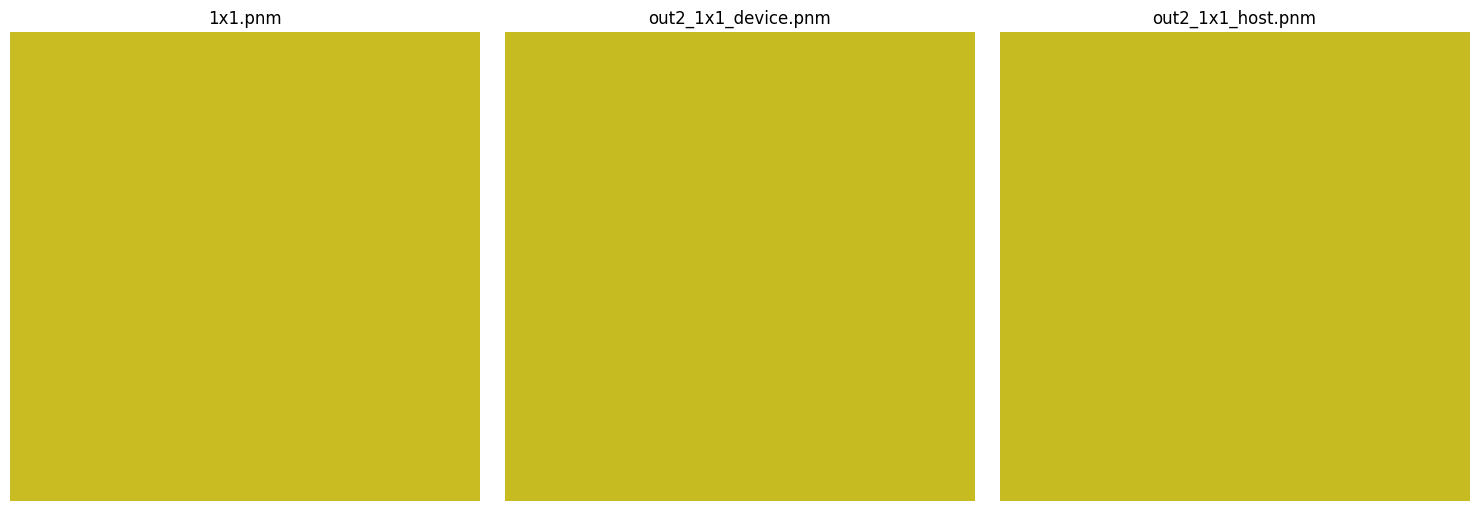

In [22]:
show_pnm_side_by_side("1x1.pnm out2_1x1_device.pnm out2_1x1_host.pnm".split())

### Default image with right sobel filter
*There is no target image*

In [23]:
!./HW1_P2.out in.pnm out2_sobel.pnm in.pnm right_sobel.txt

Image size (width x height): 512 x 512

Processing time (use host): 25.671713 ms
Error: 112.819725

GPU name: Tesla T4
GPU compute capability: 7.5
Block: 32 x 32, filterWidth=3
Processing time (use device): 1.403744 ms
Error: 112.819725

Error between host and device: 0.000000



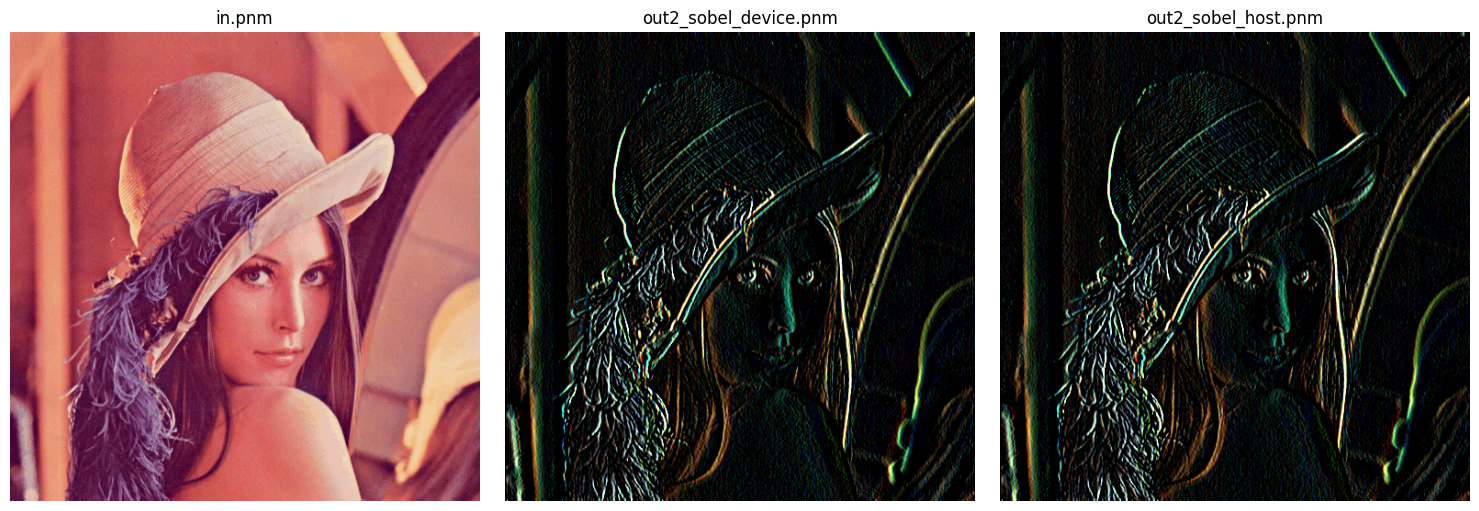

In [24]:
show_pnm_side_by_side("in.pnm out2_sobel_device.pnm out2_sobel_host.pnm".split())

### 250x250 with emboss filter
*There is no target image*

In [25]:
!./HW1_P2.out 250x250.pnm out2_250x250_emboss.pnm 250x250.pnm filter_emboss.txt

Image size (width x height): 250 x 250

Processing time (use host): 9.969888 ms
Error: 39.218178

GPU name: Tesla T4
GPU compute capability: 7.5
Block: 32 x 32, filterWidth=3
Processing time (use device): 0.828992 ms
Error: 39.218178

Error between host and device: 0.000000



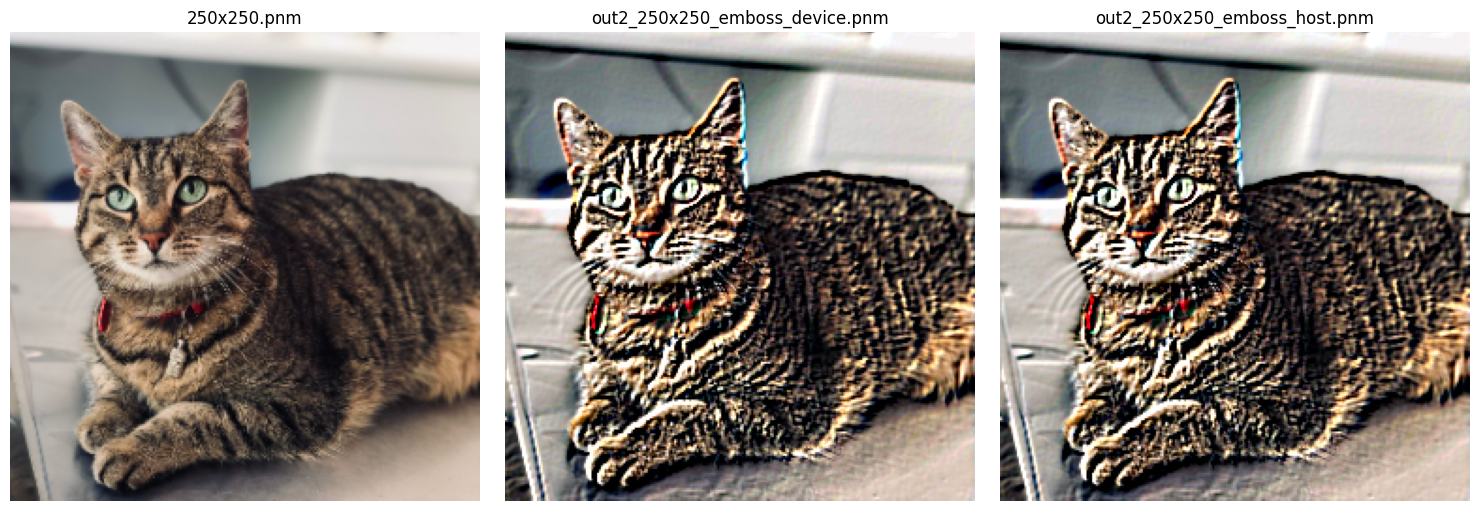

In [26]:
show_pnm_side_by_side("250x250.pnm out2_250x250_emboss_device.pnm out2_250x250_emboss_host.pnm".split())